<a href="https://colab.research.google.com/github/sagnikbiswas/My_Keras_Notebooks/blob/main/keras_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building an Image Classifier Model with Keras

We will train our model on the MNIST dataset.

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import load_model
import matplotlib.pyplot as plt

# Not necessary - only for rough works
import numpy as np
from PIL import Image
import requests
from IPython.display import display

In [2]:
# mnist is a numpy zip archive containing the training and testing numpy datasets for hand written digit recognization
# for this notebook its not necessary to import numpy itself
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

6000 28x28 samples of handwritten digits. We would need to flatten them to 784x1 vectors for input.

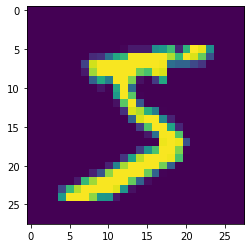

In [4]:
plt.imshow(X_train[0])

In [5]:
num_pixels = X_train.shape[1] * X_train.shape[2] # find size of vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# one hot encode outputs
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

num_classes = y_test_ohe.shape[1]
print(num_classes)
y_test_ohe.shape

10


(10000, 10)

###Build the model

In [8]:
# define classification model
def my_classification_model():
    # create model
    my_model = Sequential()
    my_model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    my_model.add(Dense(100, activation='relu'))
    my_model.add(Dense(num_classes, activation='softmax'))    # softmax for classification
    
    
    # compile model
    my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return my_model

### Train and Test

In [9]:
# build the model
my_model = my_classification_model()

# fit the model -  takes 3 minutes on CPU - use GPU
my_model.fit(X_train, y_train_ohe, validation_data=(X_test, y_test_ohe), epochs=10, verbose=2)

# evaluate the model
scores = my_model.evaluate(X_test, y_test_ohe, verbose=0)

Epoch 1/10
1875/1875 - 18s - loss: 0.1839 - accuracy: 0.9439 - val_loss: 0.1283 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 - 4s - loss: 0.0763 - accuracy: 0.9764 - val_loss: 0.0774 - val_accuracy: 0.9757
Epoch 3/10
1875/1875 - 4s - loss: 0.0517 - accuracy: 0.9834 - val_loss: 0.0784 - val_accuracy: 0.9753
Epoch 4/10
1875/1875 - 3s - loss: 0.0392 - accuracy: 0.9870 - val_loss: 0.0838 - val_accuracy: 0.9787
Epoch 5/10
1875/1875 - 4s - loss: 0.0302 - accuracy: 0.9898 - val_loss: 0.0614 - val_accuracy: 0.9804
Epoch 6/10
1875/1875 - 4s - loss: 0.0258 - accuracy: 0.9913 - val_loss: 0.0852 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 - 3s - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0826 - val_accuracy: 0.9784
Epoch 8/10
1875/1875 - 4s - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0920 - val_accuracy: 0.9795
Epoch 9/10
1875/1875 - 4s - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0939 - val_accuracy: 0.9779
Epoch 10/10
1875/1875 - 3s - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0995 -

In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9775999784469604% 
 Error: 0.02240002155303955


In [14]:
# We can save a Keras model. since colab deletes local files on restart its useless but shown here just for demonstration
my_model.save('my_classification_model.h5')

In [15]:
# load saved model
pretrained_model = load_model('my_classification_model.h5')

We were able to train on a dataset of 28x28 images. But what about higher resolution samples? Do we use 1920*1080\*3 input neurons for FHD color images?